In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("islander_raw.csv")
df.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1188 non-null   int64  
 1   index             1188 non-null   int64  
 2   first_name        1188 non-null   object 
 3   last_name         1188 non-null   object 
 4   age               1188 non-null   int64  
 5   Happy_Sad_group   1188 non-null   object 
 6   Dosage            1188 non-null   int64  
 7   Drug              1188 non-null   object 
 8   Mem_Score_Before  1188 non-null   float64
 9   Mem_Score_After   1188 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 92.9+ KB


In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'first_name', 'last_name', 'age',
       'Happy_Sad_group', 'Dosage', 'Drug', 'Mem_Score_Before',
       'Mem_Score_After'],
      dtype='object')

In [15]:
# Drop unnecessary columns
df.drop(columns = ['Unnamed: 0','index'], axis = 1, inplace = True)

In [33]:
df.isnull().sum()

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Improvement         0
dtype: int64

In [29]:
df['Improvement'] = df['Mem_Score_After'] - df['Mem_Score_Before']

In [31]:
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Improvement
0,Daichi,Steiner,37,S,1,T,64.2,57.3,-6.9
1,Kaito,Carrasco,35,S,2,A,75.0,82.9,7.9
2,Sara,Castro,35,H,2,S,46.0,43.2,-2.8
3,Ryouta,Carrasco,49,H,3,S,62.8,54.1,-8.7
4,Daichi,Gonzalez,68,H,3,A,41.9,67.4,25.5


In [35]:
df_cleaned = df

In [43]:
df_cleaned.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Improvement
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,11.997750,0.816778,15.732766,18.095618,10.731928
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.500000,47.100000,-3.200000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.800000,73.300000,6.000000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [47]:
df_cleaned.groupby('Happy_Sad_group')[['Mem_Score_Before','Mem_Score_After','Improvement']].mean()

,Mem_Score_Before,Mem_Score_After,Improvement
Happy_Sad_group,,,
H,57.843434,60.576768,2.733333
S,58.091919,61.267677,3.175758


In [49]:
df_cleaned.groupby('Drug')[['Mem_Score_Before','Mem_Score_After','Improvement']].mean()

,Mem_Score_Before,Mem_Score_After,Improvement
Drug,,,
A,58.211940,67.682090,9.470149
S,58.484848,58.313636,-0.171212
T,57.190769,56.603077,-0.587692


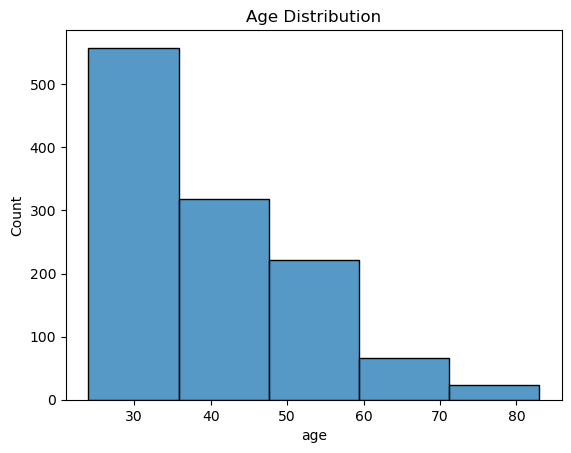

In [53]:
#Age distribution
sns.histplot(data = df_cleaned['age'], bins = 5)
plt.title('Age Distribution')
plt.show()

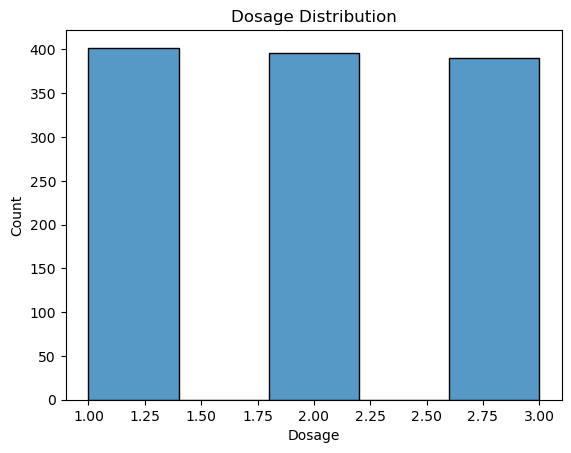

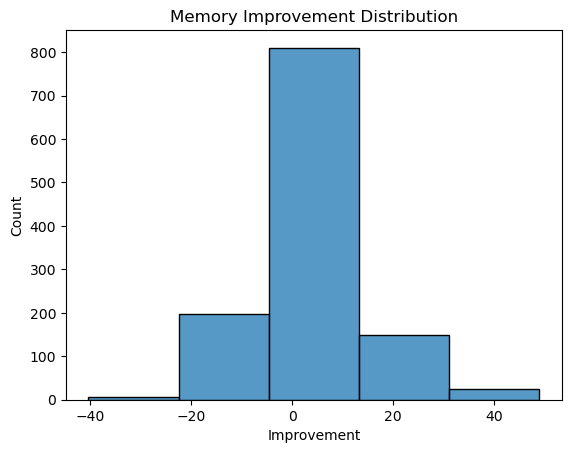

In [63]:
#Dosage distribution
sns.histplot(data = df_cleaned['Dosage'], bins = 5)
plt.title('Dosage Distribution')
plt.show()

#Memory improvement distribution
sns.histplot(data = df_cleaned['Improvement'], bins = 5)
plt.title('Memory Improvement Distribution')
plt.show()

In [71]:
avg_improvement_drug = df_cleaned.groupby('Drug')['Improvement'].mean()
avg_improvement_group = df_cleaned.groupby('Happy_Sad_group')['Improvement'].mean()

print(avg_improvement_drug)
print(avg_improvement_group)

Drug
A    9.470149
S   -0.171212
T   -0.587692
Name: Improvement, dtype: float64
Happy_Sad_group
H    2.733333
S    3.175758
Name: Improvement, dtype: float64


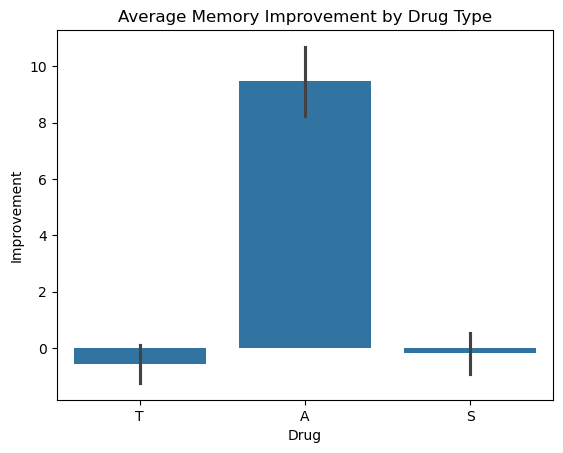

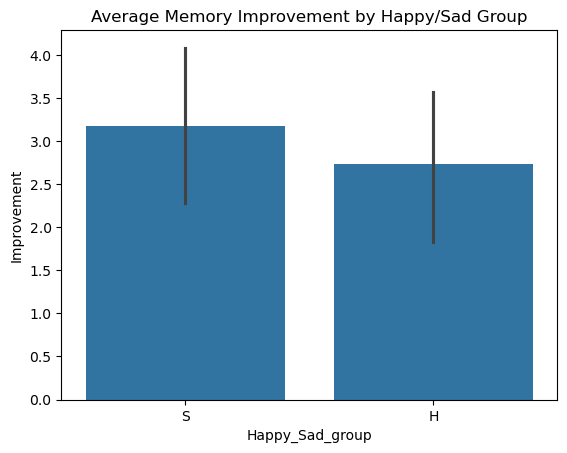

In [73]:
#Visualize avg improvement
sns.barplot(data = df_cleaned, x = 'Drug', y = 'Improvement')
plt.title('Average Memory Improvement by Drug Type')
plt.show()

sns.barplot(data = df_cleaned, x= 'Happy_Sad_group', y='Improvement')
plt.title('Average Memory Improvement by Happy/Sad Group')
plt.show()

Drug A shows the highest memory improvement on average.
Drugs T and S show little to no improvement in memory.
Drug A stands out as the most effective of the three for memory enhancement.

Happy group shows more consistent memory improvement.
Sad group has a wider range and more extreme improvement scores.
Both groups have similar average improvement.

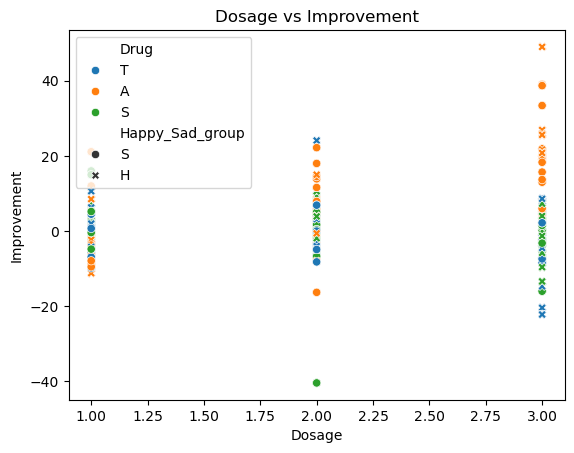

In [79]:
sns.scatterplot(data = df_cleaned, x = 'Dosage', y ='Improvement' , hue= 'Drug', style = 'Happy_Sad_group')
plt.title('Dosage vs Improvement')
plt.show()

At low dose [1.0], varied improvement with all drugs.

Medium dose[2.0]: Drug A causes drop in Sad group.

High dose[3.0]: Diverse improvements across groups.

Happy group: More consistent improvements overall.

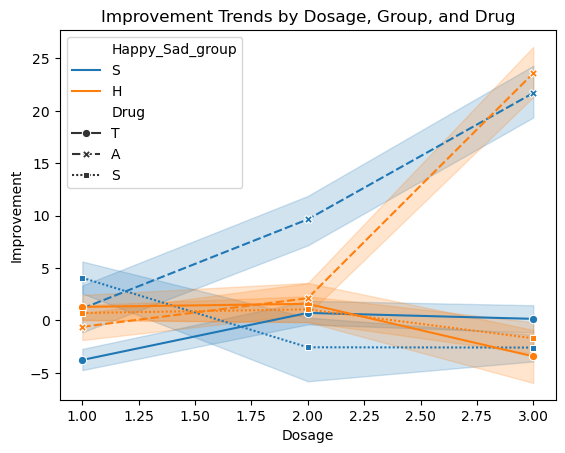

In [83]:
sns.lineplot(data=df_cleaned, x='Dosage', y='Improvement', hue='Happy_Sad_group', style='Drug', markers=True)
plt.title('Improvement Trends by Dosage, Group, and Drug')
plt.show()

Drug A: Shows the highest improvement at mid-dose for the Sad group and high dose for the Happy group.

Drug T: Consistent improvement across all doses for the Happy group.

Drug S: Varies significantly, less effective overall.

Happy Group: Generally more consistent improvement.

Sad Group: More varied responses to different drugs.



In [104]:
#Outliers detection

Q1 = df_cleaned['Improvement'].quantile(0.25)
Q3 = df_cleaned['Improvement'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_cleaned[(df_cleaned['Improvement'] < lower_bound) | (df_cleaned['Improvement'] > upper_bound)]
outliers

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Improvement
4,Daichi,Gonzalez,68,H,3,A,41.9,67.4,25.5
5,Mark,Durand,36,S,1,A,54.8,75.9,21.1
16,Megan,Kennedy,27,S,3,A,81.0,120.0,39.0
71,Jade,Summers,40,S,3,A,59.8,79.7,19.9
75,Evan,Lopez,35,H,3,A,31.7,53.4,21.7
...,...,...,...,...,...,...,...,...,...
1167,Eva,Takahashi,31,S,2,S,84.5,44.1,-40.4
1174,Noemie,Kennedy,73,H,3,T,110.0,87.8,-22.2
1177,Noemie,Kennedy,73,H,3,T,110.0,87.8,-22.2
1183,Laura,McCarthy,34,S,3,A,57.3,96.0,38.7


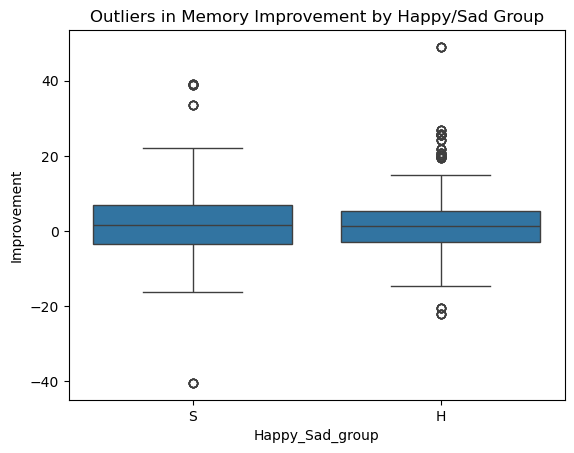

In [108]:
sns.boxplot(data=df_cleaned, x='Happy_Sad_group', y='Improvement')
plt.title('Outliers in Memory Improvement by Happy/Sad Group')
plt.show()

The Sad group shows more variability and extreme values (outliers) in scores compared to the Happy group.

Consistent Improvement in Happy Group: The Happy group tends to show more consistent improvement.